In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

# on non_normalized data

In [27]:
df = pd.DataFrame(pd.read_parquet('../data/dataset_non_normalized.parquet'))

In [28]:
df.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,5849,0.0,146.412162,360.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,4583,1508.0,128.000000,360.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,3000,0.0,66.000000,360.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,2583,2358.0,120.000000,360.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,6000,0.0,141.000000,360.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [30]:
X = df.drop(['Loan_Status_N', 'Loan_Status_Y'], axis = 1)
y = df['Loan_Status_Y']

In [31]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.35, random_state = 0)

In [32]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 15/35, random_state = 0)

In [33]:
print(len(y_train)/len(y))
print(len(y_val)/len(y))
print(len(y_test)/len(y))

0.6498371335504886
0.1986970684039088
0.15146579804560262


In [35]:
logreg = LogisticRegression(penalty = None, max_iter = 100)

i didnt used regularization for now. if the model overfitted i will use a suitable one.
i used default parameters for now.

In [36]:
logreg.fit(X_train, y_train)

C:\Users\Pacific\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,None
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [37]:
print('in_score : ', logreg.score(X_train, y_train))
print('out_score : ', logreg.score(X_val, y_val))

in_score :  0.8020050125313283
out_score :  0.819672131147541


In [45]:
cv_scores = cross_validate(logreg, X_train, y_train, cv = 10, return_train_score = True)

C:\Users\Pacific\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Pacific\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://s

In [47]:
cv_scores

{'fit_time': array([0.01912999, 0.0401051 , 0.04501939, 0.02186847, 0.0224719 ,
        0.02766752, 0.02945638, 0.05123329, 0.09052777, 0.01668143]),
 'score_time': array([0.01572394, 0.        , 0.00199366, 0.00199366, 0.        ,
        0.        , 0.00166011, 0.        , 0.        , 0.        ]),
 'test_score': array([0.85      , 0.775     , 0.85      , 0.8       , 0.85      ,
        0.675     , 0.75      , 0.825     , 0.75      , 0.79487179]),
 'train_score': array([0.7994429 , 0.79387187, 0.7994429 , 0.80222841, 0.79665738,
        0.81058496, 0.81058496, 0.79665738, 0.80501393, 0.79722222])}

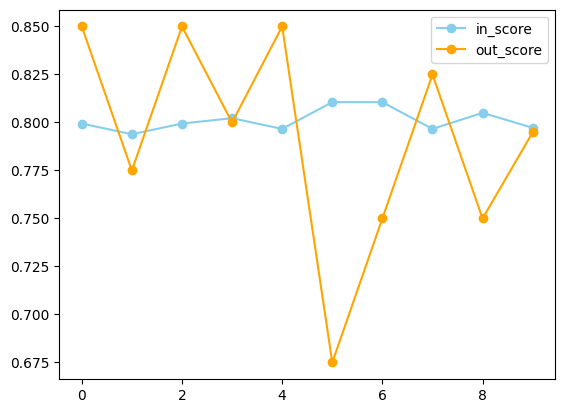

In [48]:
plt.plot(range(10), cv_scores['train_score'], 'o-', color = 'skyblue', label = 'in_score')
plt.plot(range(10), cv_scores['test_score'], 'o-', color = 'orange', label = 'out_score')
plt.legend()
plt.show()

In [50]:
print('in_score :', cv_scores['train_score'].mean())
print('out_score :', cv_scores['test_score'].mean())

in_score : 0.801170690188796
out_score : 0.7919871794871794


### fine tuning max_iter :

C:\Users\Pacific\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 30 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=30).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Pacific\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 50 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=50).
You might also want to scale the data as shown in:
    https://sciki

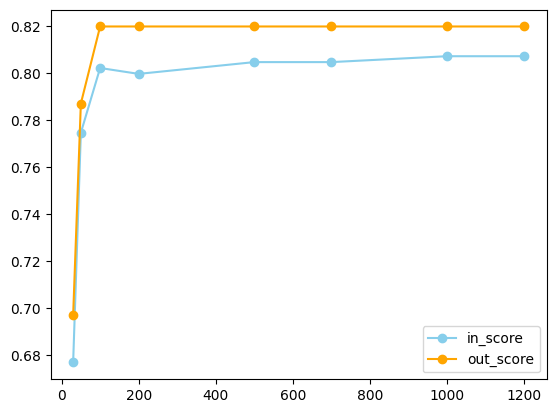

In [52]:
max_iter_list = [30, 50, 100, 200, 500, 700, 1000, 1200]
in_scores = []
out_scores = []
for max_iter in max_iter_list :
    logreg = LogisticRegression(penalty = None, max_iter = max_iter)
    logreg.fit(X_train, y_train)
    in_scores.append(logreg.score(X_train, y_train))
    out_scores.append(logreg.score(X_val, y_val))

plt.plot(max_iter_list, in_scores, 'o-', color = 'skyblue', label = 'in_score')
plt.plot(max_iter_list, out_scores, 'o-', color = 'orange', label = 'out_score')
plt.legend()
plt.show()

max_iter = 500

in general we dont have over fitting because when i did cross validation yoy can see in the past plot that the scores are near each other... so i wont use regularization. but i try to show if regularization is helpful or not .

### regularization

C:\Users\Pacific\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Pacific\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Pacific\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Pacific\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Pacific\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_r

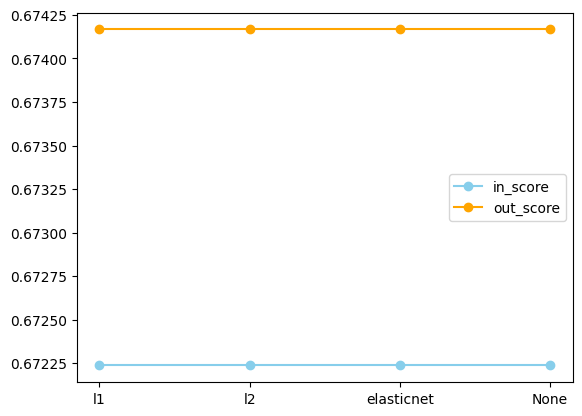

In [56]:
regularizations = ['l1', 'l2', 'elasticnet', None]
in_scores = []
out_scores = []
for penalty in regularizations :
    logreg = LogisticRegression(penalty = penalty,
                                max_iter = 500,
                                solver = 'saga',
                                l1_ratio = 0.5)
    cv_scores = cross_validate(logreg, X_train, y_train, cv = 10, return_train_score = True)
    in_scores.append(cv_scores['train_score'].mean())
    out_scores.append(cv_scores['test_score'].mean())

xaxis = ['l1', 'l2', 'elasticnet', 'None']
plt.plot(xaxis, in_scores, 'o-', color = 'skyblue', label = 'in_score')
plt.plot(xaxis, out_scores, 'o-', color = 'orange', label = 'out_score')
plt.legend()
plt.show()

so regularization doesnt do anything !

so for non_normal data :

In [59]:
logreg = LogisticRegression(penalty = None, max_iter = 500)
logreg.fit(X_train, y_train)
acc = logreg.score(X_test, y_test)
acc

C:\Users\Pacific\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8494623655913979

### accuracy of LogisticRegression on non_scaled data :

85 %

# on normalized data

In [60]:
df = pd.DataFrame(pd.read_parquet('../data/dataset_normalized.parquet'))

In [61]:
X = df.drop(['Loan_Status_N', 'Loan_Status_Y'], axis = 1)
y = df['Loan_Status_Y']

In [62]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.35, random_state = 0)

In [63]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 15/35, random_state = 0)

In [64]:
logreg = LogisticRegression(penalty = None, max_iter = 500)

In [65]:
logreg.fit(X_train, y_train)

,penalty,None
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [66]:
print(logreg.score(X_train, y_train))
print(logreg.score(X_val, y_val))

0.8020050125313283
0.819672131147541


In [67]:
cv_scores = cross_validate(logreg, X_train, y_train, cv = 10, return_train_score = True)

In [68]:
print(cv_scores['train_score'].mean())
print(cv_scores['test_score'].mean())

0.8025634478489632
0.7996153846153846


its realy the same as the non normal data !!!!

#### fine tuning max_iter

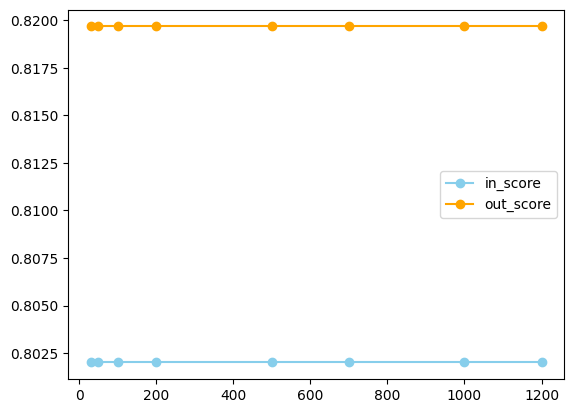

In [69]:
max_iter_list = [30, 50, 100, 200, 500, 700, 1000, 1200]
in_scores = []
out_scores = []
for max_iter in max_iter_list :
    logreg = LogisticRegression(penalty = None, max_iter = max_iter)
    logreg.fit(X_train, y_train)
    in_scores.append(logreg.score(X_train, y_train))
    out_scores.append(logreg.score(X_val, y_val))

plt.plot(max_iter_list, in_scores, 'o-', color = 'skyblue', label = 'in_score')
plt.plot(max_iter_list, out_scores, 'o-', color = 'orange', label = 'out_score')
plt.legend()
plt.show()

!!!!

In [71]:
acc = logreg.score(X_test, y_test)
acc

0.8494623655913979

completely the same as non normal data

### so for LogisticRegression the performance doesnt depend on data normalizing OR the data doesnt need normalization

# 85 % accuracy